### Group
### Yiming Ding USC ID: 2686500598
### Chelsy Xia USC ID: 9129895107
### Siyu Mao USC ID: 5310559365
### Yang Qian USC ID: 7755914811

In [186]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [187]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [188]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [189]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [191]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [192]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sdycoff, Mr. Todor",male,347082,G6,S
freq,1,577,7,4,644


In [194]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [195]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [196]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [197]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


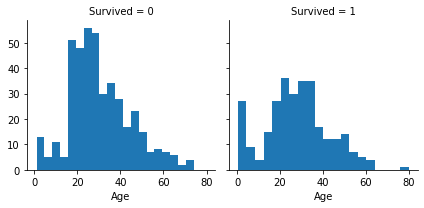

In [198]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/Users/chris/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


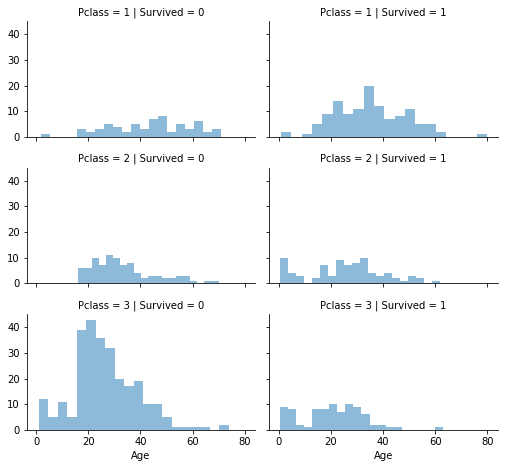

In [199]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Users/chris/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/chris/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


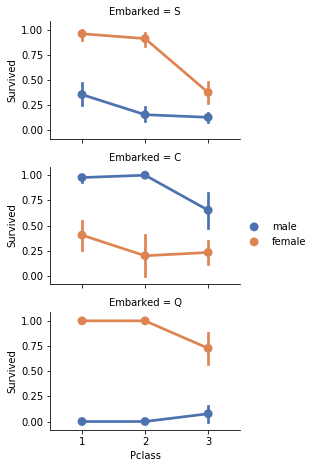

In [200]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/chris/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


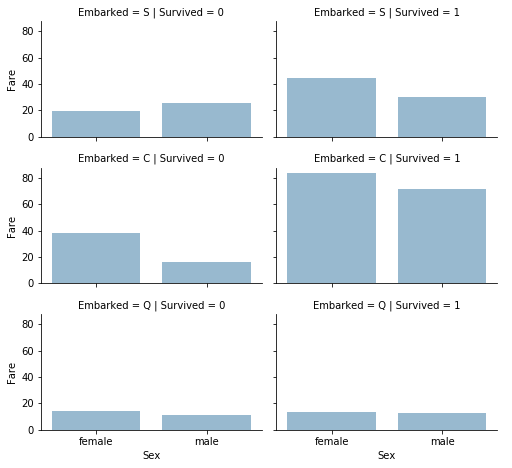

In [201]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [202]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [203]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [204]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [205]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [206]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [207]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


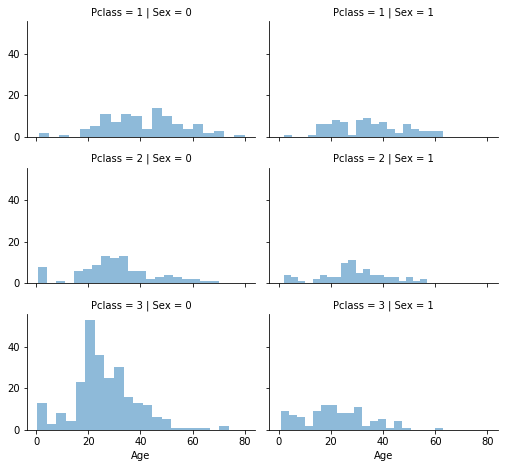

In [208]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [209]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [210]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [211]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [212]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [213]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [214]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [215]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [216]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [217]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [218]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [219]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [220]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [221]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create FareBand.

In [222]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [223]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [224]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [225]:
x_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
x_test  = test_df.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

### (2)

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [227]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size = 0.33,random_state = 1)

In [228]:
X_train.shape

(596, 8)

In [229]:
# Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(X_test)
y_pred1 = logreg.predict(x_test)
acc_log = round(accuracy_score(Y_test,Y_pred1)*100,2)
acc_log

77.97

#### the logistic regression rate is 77.97

In [230]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.228865
5,Title,0.501144
2,Age,0.321336
4,Embarked,0.264976
6,IsAlone,-0.077152
3,Fare,-0.188910
7,Age*Class,-0.340576
0,Pclass,-0.799318


In [231]:
# Support Vector Machines
param_grid = [{'C':[0.01,0.1,1,10,100],'gamma':[0.5,1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=10,scoring='accuracy',
                                                      iid = False)
clf.fit(X_train,Y_train)
clf.best_estimator_
svc = clf.best_estimator_
svc

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [232]:
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(X_test)
y_pred2 = svc.predict(x_test)
acc_svc = round(accuracy_score(Y_test, Y_pred2) * 100, 2)
acc_svc

78.98

#### the SVM accuracy rate is 78.98

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [234]:
# knn
max_depths = range(1,21)
param_grid = [{'n_neighbors':max_depths}]
clf = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,iid = False)
clf.fit(X_train,Y_train)
clf.best_params_

{'n_neighbors': 3}

In [235]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred3 = knn.predict(X_test)
y_pred3 = knn.predict(x_test)
acc_knn = round(accuracy_score(Y_test, Y_pred3) * 100, 2)
acc_knn

76.27

#### the knn accuracy rate is 76.27

In [236]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred4 = gaussian.predict(X_test)
y_pred4 = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(Y_test, Y_pred4) * 100, 2)
acc_gaussian

70.17

#### the gaussian accuracy rate is 70.17

In [237]:
# Perceptron
perceptron = Perceptron(random_state = 1)
perceptron.fit(X_train, Y_train)
Y_pred5 = perceptron.predict(X_test)
y_pred5 = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(Y_test, Y_pred5) * 100, 2)
acc_perceptron

66.1

#### the perceptron accuracy rate is 66.1

In [238]:
# Linear SVC
param_grid = [{'C':[0.01,0.1,1,10,100],'gamma':[0.5,1,2,3,4]}]
clf2 = GridSearchCV(SVC(kernel='linear'),param_grid,cv=10,scoring='accuracy',
                                                      iid = False)
clf2.fit(X_train,Y_train)
clf2.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [239]:
linear_svc = clf2.best_estimator_
linear_svc.fit(X_train, Y_train)
Y_pred6 = linear_svc.predict(X_test)
y_pred6 = linear_svc.predict(x_test)
acc_linear_svc = round(accuracy_score(Y_test, Y_pred6) * 100, 2)
acc_linear_svc

75.59

#### the linear svc is accuracy rate is 75.59

In [240]:
# Stochastic Gradient Descent

sgd = SGDClassifier(random_state=1)
sgd.fit(X_train, Y_train)
Y_pred7 = sgd.predict(X_test)
y_pred7 = sgd.predict(x_test)
acc_sgd = round(accuracy_score(Y_test, Y_pred7) * 100, 2)
acc_sgd

76.27

#### the SGD accuracy rate is 76.27

In [241]:
depth_values = range(1,12,1)
param_grid = dict(max_depth = depth_values)
model = DecisionTreeClassifier()
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state =1)
grid_search = GridSearchCV(model,param_grid,cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)
means = grid_result.cv_results_['mean_test_score']
df = pd.DataFrame()
df['params'] = depth_values
df['mean test score'] = means

In [242]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.840604 using {'max_depth': 3}


In [243]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth=3,random_state=1)
decision_tree.fit(X_train, Y_train)
Y_pred8 = decision_tree.predict(X_test)
y_pred8 = decision_tree.predict(x_test)
acc_decision_tree = round(accuracy_score(Y_test, Y_pred8) * 100, 2)
acc_decision_tree

78.31

#### the decision tree accuracy rate is 78.31

In [244]:
from sklearn.model_selection import StratifiedKFold

In [245]:
n_estimators = range(20,110,1)
model_1 = RandomForestClassifier()
param_grid = dict(n_estimators = n_estimators)

kfold = StratifiedKFold(n_splits = 10, shuffle = True,random_state = 1)
grid_search = GridSearchCV(model_1,param_grid,cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.813758 using {'n_estimators': 24}


In [246]:
random_forest = RandomForestClassifier(n_estimators = 21,random_state = 1)
random_forest.fit(X_train, Y_train)
Y_pred9 = random_forest.predict(X_test)
y_pred9 = random_forest.predict(x_test)
acc_random_forest = round(accuracy_score(Y_test, Y_pred9) * 100,2)
acc_random_forest

80.0

#### the random forest accuracy rate is 80

In [247]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
n_estimators = range(20,110,1)
model_1 = XGBClassifier()
param_grid = dict(n_estimators = n_estimators)

kfold = StratifiedKFold(n_splits = 10, shuffle = False, random_state =1)
grid_search = GridSearchCV(model_1,param_grid,cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.842282 using {'n_estimators': 26}


In [248]:
import xgboost as xgb

In [249]:
Learning_rate = np.linspace(0,1,10, endpoint=False)
param_grid = [{'learning_rate':Learning_rate}]
clf = GridSearchCV(xgb.XGBClassifier(),param_grid,cv=10,scoring='accuracy',iid=True,return_train_score=True)
clf.fit(X_train,Y_train)
clf.best_params_

{'learning_rate': 0.1}

In [250]:
xgboosting = XGBClassifier(n_estimators = 26,learning_rate = 0.1,max_depth = 11,random_state = 1)
# what is the parameters, increase the learning rate, score increase
xgboosting.fit(X_train, Y_train)
Y_pred10 = xgboosting.predict(X_test)
y_pred10 = xgboosting.predict(x_test)
acc_xgboosting = round(accuracy_score(Y_test, Y_pred10) * 100, 2)
acc_xgboosting

78.31

#### the xgboost accuracy rate is 78.31

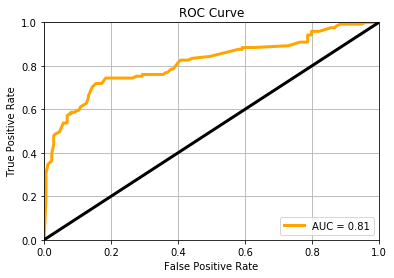

In [251]:
# 2) ROC curve
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(Y_test,xgboosting.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = 'orange',lw=3,label = 'AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='black',lw = 3)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.grid()      

#### the auc is 0.81

### 3

In [252]:
# 3) voting
df = pd.DataFrame()
df['logistic_regression'] = Y_pred1
df['svc'] = Y_pred2
df['knn'] = Y_pred3
df['gaussian'] = Y_pred4
df['perceptron'] = Y_pred5
df['linear_svc'] = Y_pred6
df['sgd'] = Y_pred7
df['decision_tree'] = Y_pred8
df['random_forest'] = Y_pred9
df['count_survived'] = df.sum(axis = 1)
df['survival_rate'] = 0
for i in range(len(df)):
    if df['count_survived'].iloc[i] > 4.5:
        df['survival_rate'].iloc[i] = 1
df[:10]

,logistic_regression,svc,knn,gaussian,perceptron,linear_svc,sgd,decision_tree,random_forest,count_survived,survival_rate
0,1,1,1,1,1,1,1,1,1,9,1
1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,1,1,8,1
3,1,1,0,1,0,1,1,1,1,7,1
4,1,1,1,1,1,1,1,1,1,9,1
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,1,0
7,1,1,1,1,1,1,1,1,1,9,1
8,0,0,0,1,0,0,1,0,0,2,0
9,1,1,1,1,0,1,1,1,1,8,1


In [253]:
Y_pred = df['survival_rate']
accuracy = round(accuracy_score(Y_test, Y_pred) * 100,2)
accuracy

78.64

#### the voting model with 9 votes accuracy rate is 78.64

In [254]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGBoosting'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_xgboosting]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,80.00
0,Support Vector Machines,78.98
8,Decision Tree,78.31
9,XGBoosting,78.31
2,Logistic Regression,77.97
1,KNN,76.27
6,Stochastic Gradient Decent,76.27
7,Linear SVC,75.59
4,Naive Bayes,70.17
5,Perceptron,66.10


In [255]:
df2 = pd.DataFrame()
df2['logistic_regression'] = Y_pred1
df2['svc'] = Y_pred2
df2['knn'] = Y_pred3
df2['gaussian'] = Y_pred4
df2['linear_svc'] = Y_pred6
df2['sgd'] = Y_pred7
df2['decision_tree'] = Y_pred8
df2['random_forest'] = Y_pred9
df2['XGBoosting'] = Y_pred10
df2['count_survived'] = df2.sum(axis = 1)
df2['survival_rate'] = 0
for i in range(len(df2)):
    if df2['count_survived'].iloc[i] > 4.5:
        df2['survival_rate'].iloc[i] = 1
df2[:10]

,logistic_regression,svc,knn,gaussian,linear_svc,sgd,decision_tree,random_forest,XGBoosting,count_survived,survival_rate
0,1,1,1,1,1,1,1,1,1,9,1
1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,9,1
3,1,1,0,1,1,1,1,1,1,8,1
4,1,1,1,1,1,1,1,1,1,9,1
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,1,0
7,1,1,1,1,1,1,1,1,1,9,1
8,0,0,0,1,0,1,0,0,0,2,0
9,1,1,1,1,1,1,1,1,1,9,1


In [256]:
Y_pred2 = df2['survival_rate']
accuracy = round(accuracy_score(Y_test, Y_pred2) * 100,5)
accuracy

78.98305

#### within 10 models, including XGBoosting, we drop the model perceptron, we got the accuracy score is 78.98305

In [266]:
df3 = pd.DataFrame()
df3['logistic_regression'] = Y_pred1
df3['svc'] = Y_pred2
df3['knn'] = Y_pred3
df3['sgd'] = Y_pred7
df3['decision_tree'] = Y_pred8
df3['random_forest'] = Y_pred9
df3['XGBoosting'] = Y_pred10
df3['count_survived'] = df3.sum(axis = 1)
df3['survival_rate'] = 0
for i in range(len(df3)):
    if df3['count_survived'].iloc[i] > 3.5:
        df3['survival_rate'].iloc[i] = 1
df3[:5]

,logistic_regression,svc,knn,sgd,decision_tree,random_forest,XGBoosting,count_survived,survival_rate
0,1,1,1,1,1,1,1,7,1
1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,7,1
3,1,1,0,1,1,1,1,6,1
4,1,1,1,1,1,1,1,7,1


In [258]:
df3_pred = df3['survival_rate']
accuracy = round(accuracy_score(Y_test, df3_pred) * 100,5)
accuracy

78.98305

#### After dropping the model gaussian, perceptron, linear_svc, we got the accuracy score is 78.98305.

In [ ]:
# The matrix for the prediction of the original test 

In [259]:
df4 = pd.DataFrame()
df4['logistic_regression'] = y_pred1
df4['svc'] = y_pred2
df4['knn'] = y_pred3
df4['sgd'] = y_pred7
df4['decision_tree'] = y_pred8
df4['random_forest'] = y_pred9
df4['XGBoosting'] = y_pred10
df4['count_survived'] = df4.sum(axis = 1)
df4['survival_rate'] = 0
for i in range(len(df4)):
    if df4['count_survived'].iloc[i] > 3.5:
        df4['survival_rate'].iloc[i] = 1
df4[:10]

,logistic_regression,svc,knn,sgd,decision_tree,random_forest,XGBoosting,count_survived,survival_rate
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,2,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,1,4,1
5,0,0,0,1,0,0,0,1,0
6,1,1,0,1,1,1,1,6,1
7,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,7,1
9,0,0,0,0,0,0,0,0,0


In [265]:
y_test = test_df.PassengerId
test_frame = pd.DataFrame()
test_frame['PassengerId'] = y_test
test_frame['survived'] = df4['svc']
test_frame.to_csv(r'final_solution123.csv', index = False)

In [5]:
# our top three best models are Random Forest, Support Vector Machines and Decision.
# With accuracy rate: 80, 78.98 and 78.31.

# Question5

In [6]:
# Our best predictions is Decision Tree (accuracy rate = 0.78947) (file: final_solution123.csv).
# Our voting model prediction accurary rate is good, 
# but it is not good enough (accuracy rate = 0.77990) (file: final_solution.csv)

# The date is 11/20/2019 and the submmission name is Chris Ding.